In [1]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [2]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("VNM.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"110,654.00","112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,3/4/2019,"111,828.00","110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,3/5/2019,"111,124.00","111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,3/6/2019,"110,341.00","111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,3/7/2019,"109,324.00","110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,5/29/2024,"66,300.00","67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,5/30/2024,"65,700.00","66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,5/31/2024,"65,400.00","65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,6/3/2024,"66,100.00","65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [4]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,110654.0,"112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,2019-03-04,111828.0,"110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,2019-03-05,111124.0,"111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,2019-03-06,110341.0,"111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,2019-03-07,109324.0,"110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,2024-05-29,66300.0,"67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,2024-05-30,65700.0,"66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,2024-05-31,65400.0,"65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,2024-06-03,66100.0,"65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing arcording to 7:3

In [6]:
# Split the data into training, testing arcording to 7:3
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]


In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15869.283, Time=3.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15866.335, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15868.306, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15868.302, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15865.168, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15870.320, Time=1.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.518 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [10]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1]


In [11]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1]
Predicted closing prices for the next 90 days:
[73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1 73162.1
 73162.1 73162.1 73162.1]


In [12]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 5142.760645202938
Testing MAE: 4317.652911392408
Testing MAPE: 6.383703870596551


In [13]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

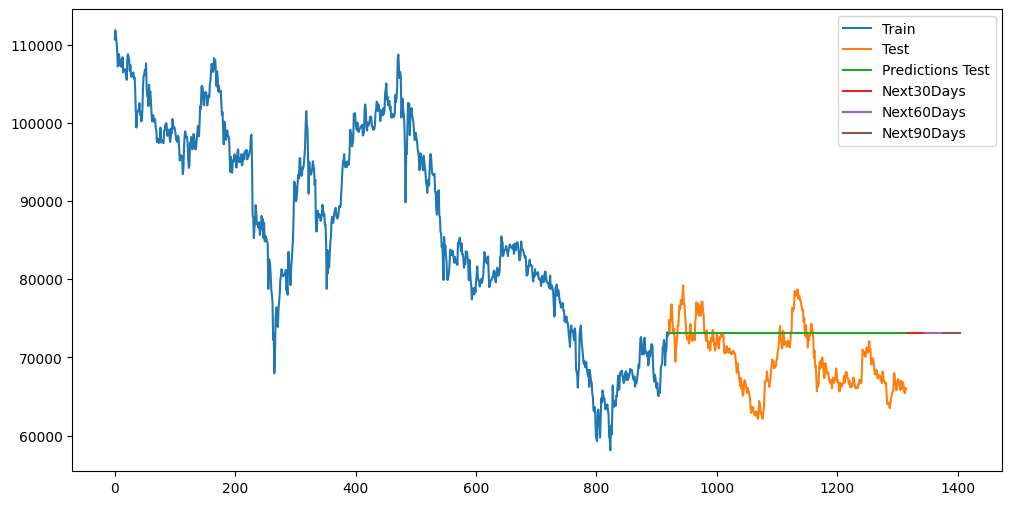

In [14]:
# Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing arcording to 8:2

In [15]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [16]:
#  Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18081.880, Time=4.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18078.623, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18080.616, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18080.611, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18077.718, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18082.626, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.588 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [18]:
#  Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.
 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.
 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.]


In [19]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.
 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.
 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.]
Predicted closing prices for the next 90 days:
[66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.
 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.
 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122. 66122.]


In [20]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100


print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 4422.276883108353
Testing MAE: 3186.7323193916354
Testing MAPE: 4.466253061891004


In [21]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

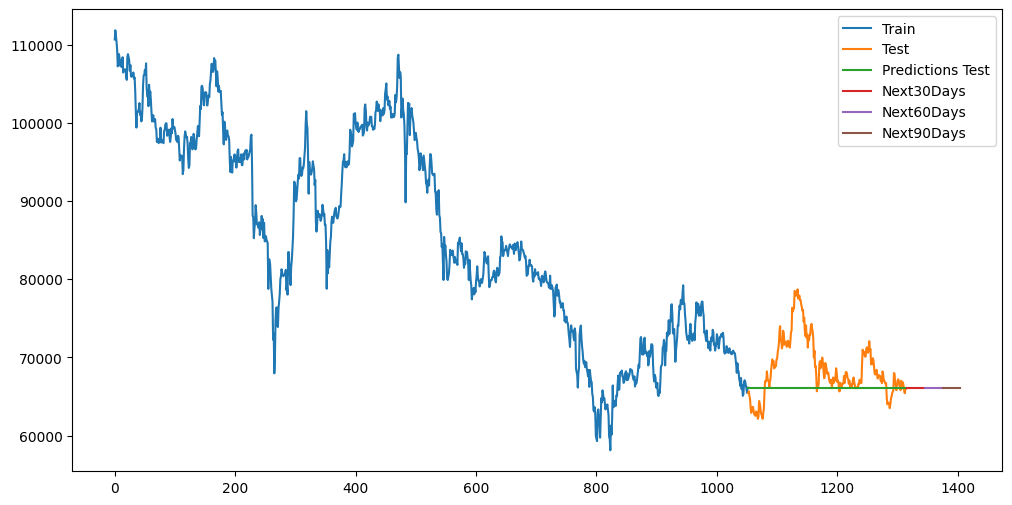

In [22]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing arcording to 9:1

In [23]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [24]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20270.780, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20262.791, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20264.792, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20264.787, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20261.711, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20266.809, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.350 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [26]:
#  Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2]


In [27]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2]
Predicted closing prices for the next 90 days:
[68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2 68598.2
 68598.2 68598.2 68598.2]


In [28]:
# 7. Tính RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 2131.8581981028133
Testing MAE: 1888.5409090909068
Testing MAPE: 2.8284331443863064


In [29]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

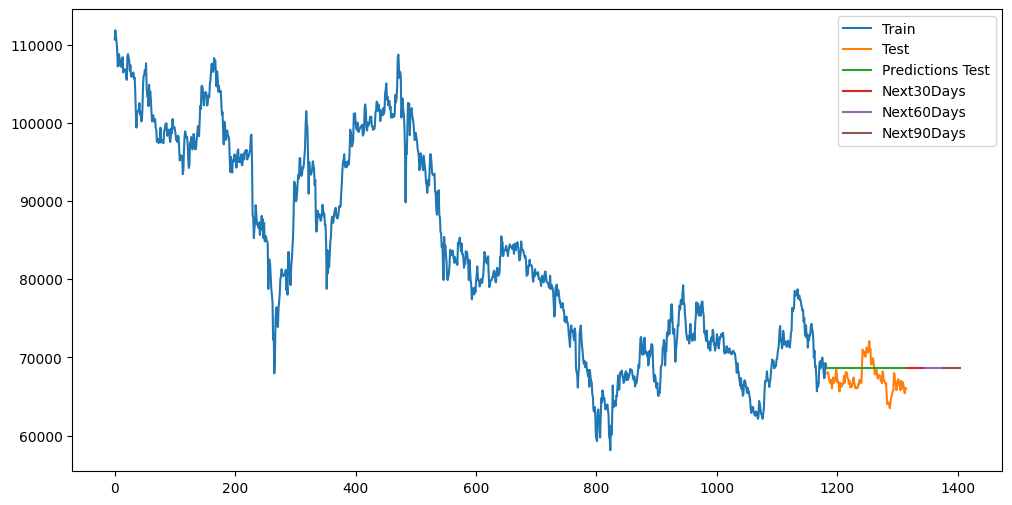

In [30]:
# Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predictions Test','Next30Days','Next60Days','Next90Days'])
plt.show()